In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab


import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('D:/Python/Insight/csv_data/all_data/final/out_with_TOT.csv')

codes = ['ovechal01','crosbsi01','malkiev01','zettehe01','richabr01','kanepa01','datsypa01','toewsjo01','backsni02','giroucl01','jagrja01','callary01','nashri01','hossama01','nealja01','pariseza01','thornjo01','bergepa01','mcdonry01','mcdavco01','matthau01','tarasvl01'] 
values = [0.9,1,0.33,0.11,0.29,1,0.57,0.9,0.11,0.56,0.125,0.33,0.11,0.14,0.11,0.22,0.22,0.22,0.33,1,1,0.33]

#df['Jersey'] = [0]*len(df)

#for i in range(0,len(df)):
    
#    if df['Code'][i] in codes:
        
#        idi = codes.index(df['Code'][i])
#        df['Jersey'][i] = values[idi]
df.head()  

,Ind,Code,First_name,Last_name,Position,Shoots,Draft_year,Draft_round,Height,Weight,...,P,P1,GS,C+/-,G+/-,GF%,xG+/-,iP+/-,iCF,iCF/60
0,0,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,NaN,NaN,0.38,1.0,NaN,50.00,0.49,-1.0,8.0,20.85
1,1,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,NaN,NaN,0.81,13.0,NaN,NaN,0.62,NaN,7.0,22.60
2,2,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,6.0,6.0,11.00,29.0,-12.0,NaN,1.85,3.0,132.0,16.55
3,3,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,18.0,14.0,31.52,132.0,13.0,62.26,8.17,NaN,212.0,16.57
4,4,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,22.0,20.0,33.72,102.0,5.0,54.24,2.34,11.0,189.0,13.04


In [3]:
df2=df.copy()
df2=df2.rename(columns = {'CF% QoC':'CFQoC'})
df2=df2.rename(columns = {'CF% QoT':'CFQoT'})
df2=df2.rename(columns = {'TOI% QoT':'TOIQoT'})

tmplst = list(df2['TOI% QoC'])
del df2['TOI% QoC']
df2['TOIQoC'] = tmplst

df2['Age_dot'] = df2['Age']
del df2['Age']
age = []
nsalary = []
maxvalue=[]
tps = [] 
dp=[]

for i in range(0,len(df2)):
    
    age.append((df2['Year'][i] -df2['Draft_year'][i]) + 18)
     
    temp = df2[df2['Year'] == df2['Year'][i]]
    maxvalue = temp['Salary'].max()
    nsalary.append(df2['Salary'][i]/maxvalue)
    tps.append(df2['OPS'][i] + df2['DPS'][i])
    
    #dp.append(df2['Draft_round'][i][0])
   
df2['Age'] = age  
df2['Salary_norm'] = nsalary
df2['TPS'] = tps

df2['CodeL'] = (np.nan)*len(df2)

codesu = df2['Code'].unique()
values=[]
for i in range(0,len(codesu)):
    info= df2[df2['Code'] == codesu[i]]
    idi = info.index.values.tolist()
    df2['CodeL'][idi]     = int(i+1)  
    
     
    
    


#df2['Round'] = dp

#df2 = df2[df2.Salary != -999].reset_index(drop=True)
#df2 = df2[df2.Year != 2018].reset_index(drop=True)
#df2018 = df2[df2.Year == 2018].reset_index(drop=True)


#df2['Round'] = df2[['Round']].astype(int)

#df2['Position']=df2[df2.Position =='C/']='C'
#df2['Position'] = df2[df2.Position =='W']='LW'

df2.info() 
df3 = df2.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Data columns (total 87 columns):
Ind            11208 non-null int64
Code           11208 non-null object
First_name     11208 non-null object
Last_name      11208 non-null object
Position       11208 non-null object
Shoots         11208 non-null object
Draft_year     11208 non-null int64
Draft_round    11208 non-null float64
Height         11208 non-null int64
Weight         11208 non-null int64
DOB            11208 non-null object
Country        11208 non-null object
Place          11208 non-null object
Year           11208 non-null int64
Team           11208 non-null object
Games          11208 non-null int64
Goals          11208 non-null int64
Assists        11208 non-null int64
Points         11208 non-null int64
PM             11208 non-null int64
Pen            11208 non-null int64
G_ev           11208 non-null int64
G_pp           11208 non-null int64
G_sh           11208 non-null int64
Gwg            1

In [4]:
df4=df3[(df3['Year']>=2016) & (df3['Year']<=2018)]
df4 = df4.fillna(df4.mean())
df4.loc[df4['PDO']<1, 'PDO']=100
df4.loc[df.Country == 'SU', 'Country'] = "RU"

In [5]:
#df4=df4.drop_duplicates(['Code'],keep='last')
df4=df4.drop(['Ind'], axis=1).reset_index(drop=True)
names = df4['Code'].unique()


In [6]:
df4.describe()

,Draft_year,Draft_round,Height,Weight,Year,Games,Goals,Assists,Points,PM,...,xG+/-,iP+/-,iCF,iCF/60,TOIQoC,Age_dot,Age,Salary_norm,TPS,CodeL
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,2007.974434,2.899105,185.410356,201.047573,2016.997735,47.013592,7.143366,11.967961,19.111327,-0.578641,...,-0.197507,-1.182711,128.134412,10.789237,28.600968,28.519134,27.023301,0.211262,2.332880,1350.270227
std,4.674064,2.143488,5.375859,15.206638,0.819988,29.151292,8.498119,12.748937,20.026833,9.304938,...,4.881162,5.316285,92.172597,3.301236,0.697108,4.452767,4.599897,0.190737,2.727519,594.708650
min,1988.000000,1.001000,163.000000,154.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,-42.000000,...,-21.260000,-25.000000,1.000000,1.510000,25.390000,19.029763,19.000000,0.013095,-1.300000,1.000000
25%,2005.000000,1.018000,183.000000,190.000000,2016.000000,18.000000,1.000000,2.000000,3.000000,-5.000000,...,-2.770000,-4.000000,46.000000,8.620000,28.130000,25.343294,24.000000,0.071429,0.100000,963.000000
50%,2009.000000,2.050000,185.000000,200.000000,2017.000000,54.000000,4.000000,8.000000,12.000000,-1.000000,...,-0.320000,-1.182711,126.000000,10.660000,28.600968,27.681422,26.000000,0.095238,1.300000,1492.500000
75%,2011.000000,4.112000,188.000000,210.000000,2018.000000,75.000000,11.000000,18.000000,30.000000,3.000000,...,1.810000,1.000000,193.750000,12.690000,29.130000,31.512695,30.000000,0.333333,3.800000,1827.000000
max,2017.000000,9.291000,206.000000,265.000000,2018.000000,84.000000,50.000000,70.000000,108.000000,49.000000,...,21.380000,33.000000,584.000000,30.030000,30.510000,46.604711,46.000000,1.000000,15.300000,2237.000000


In [7]:

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]
for i in range(0,len(df4)):
    


    rate = 82.0/df4['Games'][i]

    gm.append(df4['Games'][i])
    G.append(.01*rate*float(df4['G_ev'][i] + df4['G_pp'][i] + df4['G_sh'][i]) )
    A.append(.01*rate*float(df4['A_ev'][i] + df4['A_pp'][i] + df4['A_sh'][i]) )
    #A.append(1.8*float (((df4['P1'][i] - df4['G'][i])/df4['TOI%'][i]) / A_baseline * (df4['A_ev'][i] + df4['A_pp'][i] + df4['A_sh'][i]))/1000)
    S.append(0) #S.append(0.00009*float(df4['S'][i]))
    blk.append(0.0004*rate*float(df4['BLK'][i]) )
    hit.append(0.0004*rate*float(df4['HIT'][i]) )
    gwy.append(0.0004*rate*float(df4['TKY'][i] - df4['GWY'][i]) )
    pen.append(0.00018*rate*float(df4['iPEND'][i] - df4['iPENT'][i])  )
    fo.append(0.00018*float(df4['FOW'][i] - df4['FOL'][i]) )
    xg.append(0.01*float(df4['xGF%'][i]/50 * df4['P/60'][i]))
    toi.append(0.0002*float(df4['TOI_avg'][i])**2  )
    defn.append(50*float(df4['CFQoC'][i] * (100-df4['OZS'][i])) / 530000 * (df4['CF%'][i])/50)
    #pts.append(rate*df4['Points'][i] / df4['PDO'][i] + df4['DPS'][i]*0.01)
    pts.append((rate*df4['Points'][i] / df4['PDO'][i]) + (rate*df4['DPS'][i] / df4['PDO'][i]))

    GSS.append((G[i]+A[i]+S[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+xg[i]+toi[i]+defn[i])*2)
    GSS_adj.append((pts[i]+S[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+xg[i]+toi[i]+defn[i])*2)
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        
              
        
                   

In [13]:
teams = df4.groupby(['Year','Team'], as_index=False).mean()

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]

for i in range(0,len(df4)):
    
    # a scaling value to provide stats as if they were for a full 82 games
    rate = 82.0/df4['Games'][i]
    # Adjusted OZS. Adjusts for team's average OZS.
    ozs_adj = float(teams[(teams['Year']==df4['Year'][i]) & (teams['Team']==df4['Team'][i])].OZS)-50
    # Games played during season
    gm.append(df4['Games'][i])
    # total blocks through 82 games
    blk.append(0.0004*rate*float(df4['BLK'][i]))
    # total hit through 82 games
    hit.append(0.0004*rate*float(df4['HIT'][i]))
    # Take-aways minus Give-aways through 82 games
    gwy.append(0.0004*rate*float(df4['TKY'][i] - df4['GWY'][i]))
    # Penalties drawn minus penalties taken through 82 games
    pen.append(0.00018*rate*float(df4['iPEND'][i] - df4['iPENT'][i]))
    # FO won minus FO lost through 82 games
    fo.append(0.00018*float(df4['FOW'][i] - df4['FOL'][i]))
    # Average Time on Ice per game
    toi.append(0.0002*float(df4['TOI_avg'][i])**2)
    # Defensive rating
    defn.append(50*float(df4['CFQoC'][i] * (ozs_adj+100-df4['OZS'][i])) / 530000 * ((df4['CF%'][i])/50) * ((df4['xGF%'][i])/50))
    # weighted total points through 82 games adjusted for PDO and DPS
    pts.append((1.025*rate*df4['Points'][i] / df4['PDO'][i]) + (1.175*rate*df4['DPS'][i] / df4['PDO'][i]))
    # Stacking
    GSS_adj.append((pts[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+toi[i]+defn[i])*2)
    
    # Apply Sigmoid function
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        

In [16]:
d = {'Code': df4['Code'], 'First_name': df4['First_name'], 'Last_name': df4['Last_name'], 'Team': df4['Team'], 'Nation': df4['Country'], 'Position': df4['Position'], 'Year': df4['Year'], 'Gms':gm, 'P_adj': pts, 'BLK': blk, 'HIT': hit, 'GWY': gwy, 'PEN': pen, 'FO': fo,'TOI': toi, 'DEFN': defn, 'GSS_adj': GSS_adj, 'Rating': rating}

ratings = pd.DataFrame(data=d)

ratings.loc[ratings.Gms <10, 'Rating']=0.50

ratings.drop(ratings[ratings.Gms <= 10].index, inplace=True)


In [17]:
ratings.sort_values(by=['Rating'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
2506,mcdavco01,Connor,McDavid,EDM,CA,C,2018,82,1.127403,0.018400,0.011200,0.017600,0.004320,-0.02826,0.090994,0.255931,2.995177,0.952356
205,giroucl01,Claude,Giroux,PHI,CA,C,2018,82,1.046990,0.009200,0.012000,-0.004000,0.001620,0.03384,0.081770,0.298054,2.958948,0.950685
2505,mcdavco01,Connor,McDavid,EDM,CA,C,2017,82,1.040481,0.011600,0.013600,0.008800,0.005940,-0.01980,0.088873,0.266063,2.831115,0.944334
938,marchbr03,Brad,Marchand,BOS,CA,LW,2018,68,1.054415,0.012059,0.017847,-0.008682,0.001085,-0.00468,0.075505,0.251538,2.798175,0.942577
323,kopitan01,Anze,Kopitar,LAK,SI,C,2018,82,0.964951,0.025600,0.020000,-0.006400,0.000540,0.02700,0.097241,0.265398,2.788659,0.942060
937,marchbr03,Brad,Marchand,BOS,CA,LW,2017,80,0.943741,0.014350,0.020910,-0.006150,-0.001845,-0.00180,0.074190,0.346375,2.779540,0.941560
346,letankr01,Kris,Letang,PIT,CA,D,2016,71,0.860102,0.056361,0.062366,-0.010163,-0.003326,0.00000,0.141193,0.277127,2.767318,0.940884
1071,hallta02,Taylor,Hall,NJD,CA,LW,2018,76,1.046157,0.018989,0.031074,0.005179,0.000583,-0.00072,0.072886,0.208553,2.765401,0.940777
1824,mackina01,Nathan,MacKinnon,COL,CA,C,2018,74,1.104967,0.009751,0.016843,-0.002216,0.001396,-0.03384,0.076362,0.193498,2.733524,0.938976
300,kanepa01,Patrick,Kane,CHI,US,RW,2016,82,1.096222,0.008400,0.014800,-0.001200,0.001080,-0.00522,0.082013,0.164259,2.720706,0.938237


In [18]:
ratings.describe()

,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
count,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,2017.009497,56.49070,0.330669,0.025150,0.041244,-0.003027,-0.000335,0.000027,0.050941,0.229412,1.348162,0.784828
std,0.822721,23.32696,0.200855,0.018159,0.024945,0.008707,0.002074,0.006983,0.025959,0.045485,0.442502,0.068004
min,2016.000000,11.00000,-0.017455,0.000000,0.000000,-0.040400,-0.013284,-0.034380,0.005660,0.067097,0.373197,0.592231
25%,2016.000000,37.00000,0.179873,0.012166,0.021867,-0.008200,-0.001291,-0.000900,0.030554,0.199577,1.034608,0.737808
50%,2017.000000,64.00000,0.282363,0.018222,0.036503,-0.001929,-0.000343,0.000000,0.047002,0.228912,1.276427,0.781841
75%,2018.000000,78.00000,0.452161,0.035307,0.056229,0.002852,0.000729,0.000000,0.066540,0.258055,1.611085,0.833562
max,2018.000000,84.00000,1.127403,0.111906,0.170560,0.032363,0.010381,0.076140,0.163363,0.392611,2.995177,0.952356


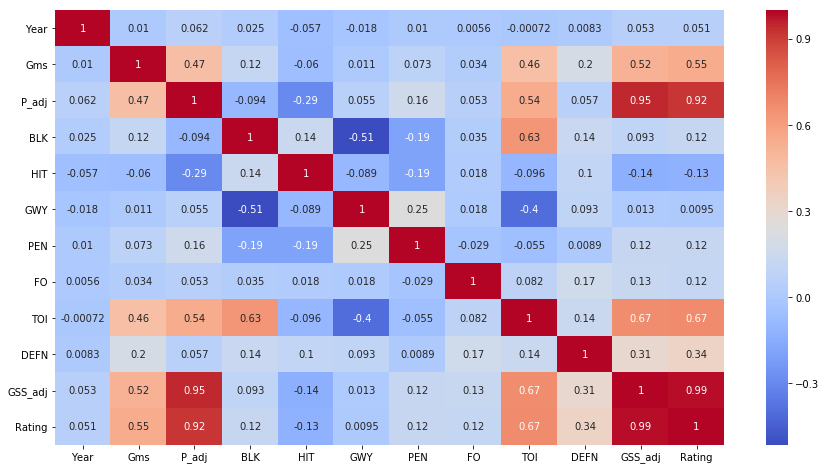

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(ratings.corr(),cmap='coolwarm',annot=True)


In [20]:
ratings_avg = ratings.groupby(['Code','First_name','Last_name','Team','Nation','Position'], as_index=False).mean()
ratings_avg.sort_values(by=['BLK'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
1169,russekr01,Kris,Russell,CGY,CA,D,2016.0,51.000000,0.275466,0.111906,0.019937,-0.009647,-0.000579,-0.00018,0.101430,0.187944,1.372554,0.797792
1172,russekr01,Kris,Russell,TOT,CA,D,2016.0,62.000000,0.288476,0.111097,0.021161,-0.012697,-0.000476,-0.00018,0.106261,0.202937,1.433157,0.807393
1170,russekr01,Kris,Russell,DAL,CA,D,2016.0,11.000000,0.348649,0.107345,0.026836,-0.026836,-0.002684,0.00000,0.115392,0.207587,1.552579,0.825286
1171,russekr01,Kris,Russell,EDM,CA,D,2017.5,73.000000,0.232961,0.098258,0.036554,-0.016722,0.001016,0.00000,0.080900,0.237412,1.340756,0.792605
986,oduyajo01,Johnny,Oduya,CHI,SE,D,2017.0,15.000000,0.133337,0.091840,0.017493,-0.021867,-0.003936,0.00000,0.067051,0.250850,1.069538,0.744509
956,nemetpa01,Patrik,Nemeth,COL,SE,D,2018.0,68.000000,0.242467,0.089235,0.031835,-0.005306,-0.001736,-0.00054,0.076128,0.264385,1.392938,0.801061
459,girarda01,Dan,Girardi,NYR,CA,D,2016.5,68.500000,0.236039,0.086429,0.065086,-0.016685,-0.000633,0.00000,0.077092,0.205516,1.305689,0.786789
867,mcdonry01,Ryan,McDonagh,TOT,US,D,2018.0,63.000000,0.436499,0.084863,0.036965,-0.008330,0.000469,0.00000,0.107648,0.247073,1.810375,0.859407
54,beaucfr01,Francois,Beauchemin,COL,CA,D,2016.5,81.500000,0.312528,0.082785,0.030380,-0.005847,-0.001266,0.00000,0.108162,0.202624,1.458733,0.808853
584,hjalmni01,Niklas,Hjalmarsson,ARI,SE,D,2018.0,48.000000,0.202950,0.080633,0.010933,-0.014350,0.000307,0.00000,0.083395,0.255839,1.239416,0.775462


In [21]:
ratings_D = ratings_avg[ratings_avg['Position']=='D']
ratings_D.sort_values(by=['Rating'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
685,karlser01,Erik,Karlsson,OTT,SE,D,2017.0,76.666667,0.837851,0.070352,0.029645,-0.016114,0.000121,-0.00006,0.147876,0.223721,2.586784,0.929606
154,burnsbr01,Brent,Burns,SJS,CA,D,2017.0,82.000000,0.808210,0.056400,0.033200,-0.026533,-0.001440,0.00006,0.125668,0.240051,2.471231,0.921637
788,letankr01,Kris,Letang,PIT,CA,D,2017.0,63.666667,0.732607,0.052400,0.054541,-0.011837,-0.001732,-0.00006,0.132107,0.263010,2.442071,0.917851
567,hedmavi01,Victor,Hedman,TBL,SE,D,2017.0,78.000000,0.705391,0.052390,0.041298,-0.009650,-0.000892,0.00000,0.118139,0.238817,2.290989,0.907011
1469,webersh01,Shea,Weber,NSH,CA,D,2016.0,78.000000,0.610554,0.067282,0.071067,-0.008410,-0.000757,0.00000,0.127311,0.251776,2.237644,0.903579
1359,subbapk01,P.K.,Subban,MTL,CA,D,2016.0,68.000000,0.686453,0.038588,0.049200,-0.040035,-0.002171,0.00000,0.137498,0.240296,2.219659,0.902001
307,doughdr01,Drew,Doughty,LAK,CA,D,2017.0,82.000000,0.609375,0.045600,0.050800,-0.028133,-0.001140,0.00000,0.148045,0.284836,2.218766,0.901563
668,josiro01,Roman,Josi,NSH,CH,D,2017.0,76.000000,0.655796,0.060535,0.027826,-0.010993,-0.000407,0.00000,0.123740,0.246440,2.205871,0.900674
159,byfugdu01,Dustin,Byfuglien,WPG,US,D,2017.0,76.666667,0.597573,0.046965,0.078268,-0.012428,-0.003839,0.00000,0.130687,0.252729,2.179909,0.898293
1360,subbapk01,P.K.,Subban,NSH,CA,D,2017.5,74.000000,0.604125,0.043842,0.041582,-0.017558,-0.000406,-0.00009,0.116694,0.273908,2.124195,0.893063


In [22]:
codes = ratings['Code'].unique()
ratings_avg = []
lastname=[]
firstname=[]
team=[]
nation= []
position=[]
for i in range(0,len(codes)):
    
    temp = ratings[ratings['Code'] == codes[i]].reset_index(drop=True)
    temp = temp.drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)
    firstname.append(temp['First_name'][0])
    lastname.append(temp['Last_name'][0])
    team.append(temp["Team"].iloc[-1])
    nation.append(temp['Nation'][0])
    position.append(temp['Position'][0])
   
    
    if len(temp) == 3:
        
        ratings_avg.append(float(0.5*temp['Rating'][2]) + float(0.3*temp['Rating'][1]) + float(0.2*temp['Rating'][0]))
        
    elif len(temp) == 2:
        
        ratings_avg.append(float(0.6*temp['Rating'][1]) + float(0.4*temp['Rating'][0]))
                           
    elif len(temp) == 1:
                           
        ratings_avg.append(float(temp['Rating']))
                           

e = {'Code': codes, 'First_name': firstname, 'Last_name': lastname, 'Team': team, 'Nation': nation, 'Position': position, 'Rating': ratings_avg}

ratings_wavg = pd.DataFrame(data=e)
       
        
        
    

In [26]:
ratings_wavg.sort_values(by=['Rating'],ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,mcdavco01,Connor,McDavid,EDM,CA,C,0.944632
1,crosbsi01,Sidney,Crosby,PIT,CA,C,0.934194
2,marchbr03,Brad,Marchand,BOS,CA,LW,0.933579
3,getzlry01,Ryan,Getzlaf,ANA,CA,C,0.928414
4,karlser01,Erik,Karlsson,OTT,SE,D,0.926647
5,kopitan01,Anze,Kopitar,LAK,SI,C,0.925077
6,kucheni01,Nikita,Kucherov,TBL,RU,RW,0.924957
7,malkiev01,Evgeni,Malkin,PIT,RU,C,0.924863
8,wheelbl01,Blake,Wheeler,WPG,US,RW,0.924790
9,giroucl01,Claude,Giroux,PHI,CA,C,0.922205


In [24]:
ratings_wavg.to_csv('2018-2019_ratings.csv')

In [25]:
ratings_wavg[ratings_wavg['Nation'] == 'CA'].sort_values(by=['Team','Last_name'],ascending=True).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,beaucfr01,Francois,Beauchemin,ANA,CA,D,0.786154
1,biekske01,Kevin,Bieksa,ANA,CA,D,0.748396
2,coglian01,Andrew,Cogliano,ANA,CA,LW,0.817200
3,desprsi01,Simon,Despres,ANA,CA,D,0.772267
4,fowleca01,Cam,Fowler,ANA,CA,D,0.849302
5,garbury01,Ryan,Garbutt,ANA,CA,C,0.699921
6,getzlry01,Ryan,Getzlaf,ANA,CA,C,0.928414
7,grantde01,Derek,Grant,ANA,CA,C,0.724275
8,horcosh01,Shawn,Horcoff,ANA,CA,C,0.775486
9,kellych01,Chris,Kelly,ANA,CA,C,0.668597


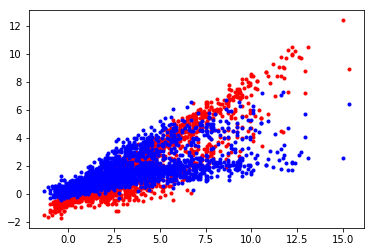

In [181]:
plt.plot(df4['TPS'],df4['OPS'],'r.',df4['TPS'],df4['DPS'],'b.')

In [ ]:
ratings.describe()

In [ ]:
ava celetto

In [32]:
ratings[ratings['Last_name'] == 'Nosek']

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,G,A,...,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS,GSS_adj,Rating
2531,nosekto01,Tomas,Nosek,DET,CS,C,2017,11,0.074545,0.00000,...,0.014909,0.029818,0.005964,0.0,0.00108,0.020281,0.293943,0.881080,0.905625,0.712104
2532,nosekto01,Tomas,Nosek,VEG,CS,C,2018,67,0.085672,0.09791,...,0.011749,0.025946,0.010770,0.0,0.00090,0.024465,0.251308,1.017441,1.050578,0.740886


In [ ]:
plt.plot(ratings2.Rating,ratings2.Salary,'.')

In [ ]:
ratings2['Rating'].hist(bins=10)

In [ ]:
ratings1[ratings1['Last_name']=='Marchand'].mean()

In [ ]:
df4['OPS'].max()

In [ ]:
7.3/10.5*105

In [ ]:
ratings2.loc[ratings2['Rating']>0.895].shape[0] / ratings2.shape[0]

# Comparison to EA sports

In [30]:
EAS = pd.read_csv('D:/Python/Insight/NHL_player_rating/2018-2019_ratings_EAS.csv')
EAS['Rating'] = EAS['Rating']*100

In [31]:
EAS.head()

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Rating,EA Sports
0,4,beaucfr01,Francois,Beauchemin,ANA,CA,D,78.615436,NaN
1,8,biekske01,Kevin,Bieksa,ANA,CA,D,74.839552,NaN
2,10,bollja01,Jared,Boll,ANA,US,RW,63.022662,NaN
3,40,coglian01,Andrew,Cogliano,ANA,CA,LW,81.720018,NaN
4,67,getzlry01,Ryan,Getzlaf,ANA,CA,C,92.841376,88.0


,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Rating,EA Sports
344,11,bollada01,Dave,Bolland,FLA,CA,C,69.797717,70.0


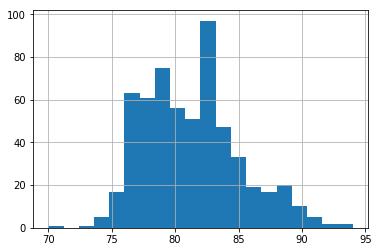

In [37]:
EAS['EA Sports'].hist(bins=20)
EAS[EAS['EA Sports']<73]

In [40]:
EAS = EAS.dropna()
EAS = EAS[EAS['Rating']>=73]

In [41]:
EAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 4 to 977
Data columns (total 9 columns):
Unnamed: 0    543 non-null int64
Code          543 non-null object
First_name    543 non-null object
Last_name     543 non-null object
Team          543 non-null object
Nation        543 non-null object
Position      543 non-null object
Rating        543 non-null float64
EA Sports     543 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 42.4+ KB


Text(0, 0.5, 'EAS Rating')

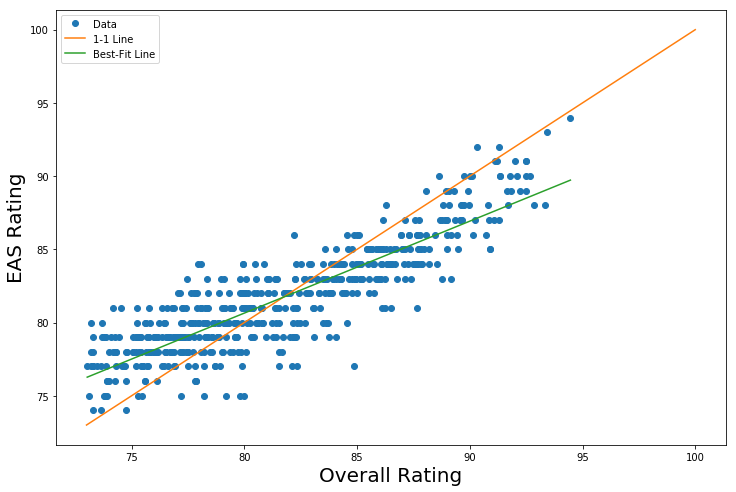

In [81]:
f, ax=plt.subplots(1,figsize=[12,8])

plt.plot(EAS['Rating'], EAS['EA Sports'],'o',[73,100],[73,100])
plt.plot(np.unique(EAS['Rating']), np.poly1d(np.polyfit(EAS['Rating'], EAS['EA Sports'], 1))(np.unique(EAS['Rating'])))
ax.legend(['Data', '1-1 Line','Best-Fit Line'])
plt.xlabel('Overall Rating',size=20)
plt.ylabel('EAS Rating',size=20)


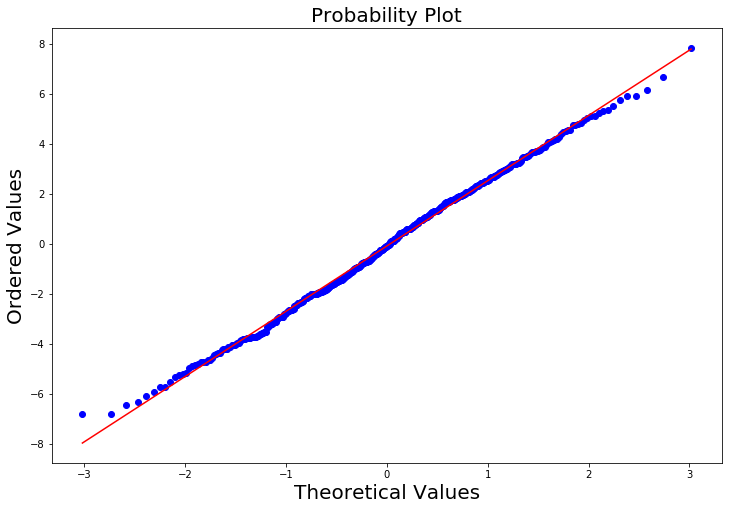

In [75]:
import numpy as np 
import pylab 
import scipy.stats as stats
f=plt.figure(3,figsize=[12,8])
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(EAS['Rating'] - EAS['EA Sports'], dist="norm", plot=pylab)

plt.xlabel('Theoretical Values',size=20)
plt.ylabel('Ordered Values',size=20)
plt.title('Probability Plot',size=20)

pylab.show()

In [349]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(EAS['Rating'], EAS['EA Sports'])
print('Slope: ' + str(slope))
print('Intercept: ' + str(intercept))
print('R2 Value: ' + str(r_value**2))
print('P-value for slope: ' + str(p_value))
print('RMSE: ' + str(((sum((EAS['Rating'] - EAS['EA Sports'])**2)) / len(EAS['EA Sports']))**0.5))

print('R_value: ' + str(np.corrcoef(EAS['Rating'], EAS['EA Sports'])))

Slope: 0.627877779465276
Intercept: 30.41457776324971
R2 Value: 0.7604391784068062
P-value for slope: 5.3251167849146766e-170
RMSE: 2.603437927868115
R_value: [[1.         0.87203164]
 [0.87203164 1.        ]]


# Significance test

Text(0, 0.5, 'Density Function')

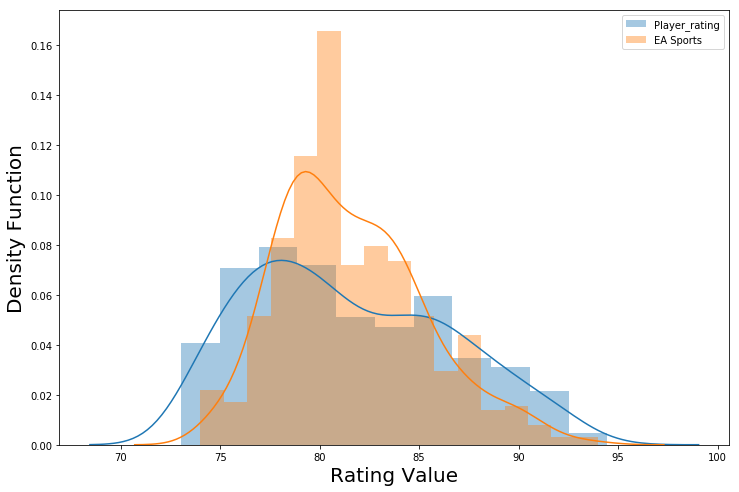

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(EAS['Rating'])
sns.distplot(EAS['EA Sports'])

ax.legend(['Player_rating', 'EA Sports'])
plt.xlabel('Rating Value',size=20)
plt.ylabel('Density Function',size=20)


In [90]:
EAS

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Rating,EA Sports
4,67,getzlry01,Ryan,Getzlaf,ANA,CA,C,92.841376,88.0
7,107,keslery01,Ryan,Kesler,ANA,US,C,86.240670,83.0
8,155,perryco01,Corey,Perry,ANA,CA,RW,85.950446,85.0
12,345,fowleca01,Cam,Fowler,ANA,CA,D,84.930205,83.0
14,404,desprsi01,Simon,Despres,ANA,CA,D,77.226711,81.0
17,506,rakelri01,Rickard,Rakell,ANA,SE,RW,88.065047,86.0
18,514,silfvja01,Jakob,Silfverberg,ANA,SE,LW,85.535113,83.0
19,568,lindhha01,Hampus,Lindholm,ANA,SE,D,84.583564,85.0
20,667,mansojo01,Josh,Manson,ANA,US,D,83.485256,83.0
22,795,ritchni01,Nick,Ritchie,ANA,CA,LW,78.246050,79.0


In [94]:
EAS_stats = EAS.describe()
EAS_stats.drop(['Unnamed: 0'],axis=1)

,Rating,EA Sports
count,543.000000,543.000000
mean,81.498437,81.585635
std,5.081585,3.658828
min,73.031037,74.000000
25%,77.306816,79.000000
50%,80.607712,81.000000
75%,85.489316,84.000000
max,94.463207,94.000000


In [352]:
# Wilcoxon signed-rank test. A paired test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(EAS['EA Sports'],EAS['Rating'])
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=71230.000, p=0.474146
Same distribution (fail to reject H0)


In [353]:
from scipy.stats import mannwhitneyu # an unpaired test

# compare samples
stat, p = mannwhitneyu(EAS['EA Sports'],EAS['Rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=140919.000, p=0.104
Same distribution (fail to reject H0)


In [52]:
x = np.arange(-5, 5, 0.1)
y =[]
for i in range(0,len(x)):
    
    y.append( 1 / (1 + math.exp(-x[i])) *100 )
    
    

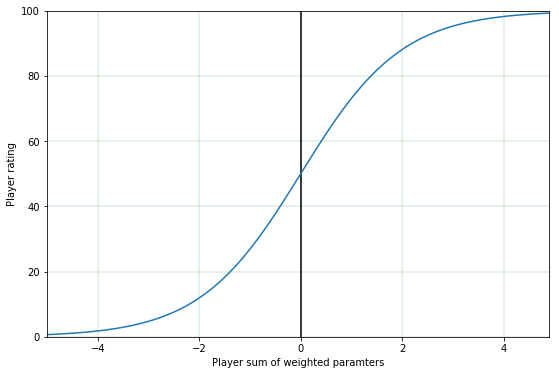

In [53]:
fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x,y)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
plt.vlines(0, ymin=0, ymax=100)
plt.grid(color='g', linestyle='-', linewidth=0.2)
plt.xlabel('Player sum of weighted paramters')
plt.ylabel('Player rating')
pylab.savefig('Sigmoid.png')